<a href="https://colab.research.google.com/github/buzzudit/Learning-Deep-Learning/blob/master/ANN_Regression_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q tensorflow-gpu -U
import tensorflow as tf

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [15]:
#Make the dataset
N  = 1000
X = np.random.random((N,2)) * 6 - 3 #uniform b/w -3 and +3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

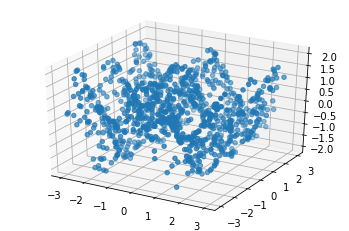

In [17]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
